In [1]:
from data.utils import parse_uim_file, plot_line_from_strokes, create_lines_from_strokes, plot_line
file_pth = '../data/speech/raw_strokes/0.uim'
strokes = parse_uim_file(file_pth, 17500)

2024-07-19 00:01:34,498 - uim - INFO - Completed configuring logger()!
2024-07-19 00:01:34,549 - uim.model.ink - INFO - Completed configuring logger()!
2024-07-19 00:01:34,549 - uim.model.ink - INFO - Completed configuring logger()!
2024-07-19 00:01:34,583 - uim.codec.parser.uim - INFO - RIFF decoder chosen.
2024-07-19 00:01:34,584 - uim.codec.parser.uim - INFO - Data packet size: 42982
2024-07-19 00:01:34,585 - uim.codec.parser.uim - INFO - Data packet size: 42982


In [2]:
# split into lines
lines = create_lines_from_strokes(strokes, 17500)

In [3]:
# line
line = lines[0]

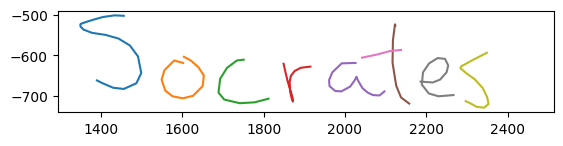

In [4]:
plot_line_from_strokes(line[:10])

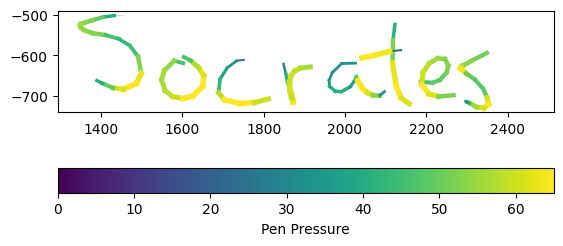

[[(1456, 503, 2), (1433, 502, 32), (1405, 506, 39), (1380, 513, 42), (1361, 519, 43), (1350, 523, 43), (1349, 526, 45), (1350, 530, 44), (1357, 537, 43), (1378, 545, 42), (1411, 550, 37), (1443, 559, 34), (1471, 576, 36), (1491, 603, 42), (1499, 644, 50), (1487, 669, 52), (1456, 683, 49), (1430, 680, 39), (1404, 669, 32), (1390, 662, 26), (1390, 662, 0)], [(1602, 619, 14), (1602, 619, 26), (1602, 619, 35), (1602, 619, 42), (1580, 613, 49), (1556, 637, 51), (1549, 660, 51), (1558, 687, 52), (1576, 701, 54), (1601, 706, 59), (1626, 700, 59), (1650, 676, 59), (1653, 650, 56), (1640, 630, 52), (1621, 613, 42), (1604, 604, 0), (1604, 604, 0)]]


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_line_from_strokes_thick(strokes):
    for stroke in strokes:
        x = [point[0] for point in stroke]
        y = [point[1] for point in stroke]
        pen_pressure = [point[2] for point in stroke]
        
        # Normalize the pen pressure to be between 0 and 4
        pen_pressure_norm = [(pressure - min(pen_pressure)) / (max(pen_pressure) - min(pen_pressure)) * 4 for pressure in pen_pressure]
        
        # Invert the y axis
        y = [-i for i in y]
        
        # Plot each segment with the corresponding pen pressure
        for i in range(len(x) - 1):
            color_value = (pen_pressure[i] - min(pen_pressure)) / (max(pen_pressure) - min(pen_pressure))
            plt.plot([x[i], x[i+1]], [y[i], y[i+1]], linewidth=pen_pressure_norm[i], color=plt.cm.viridis(color_value))
    
    # Stretch the plot to match the aspect ratio of the text
    plt.gca().set_aspect('equal', adjustable='box')
    
    # Add a colorbar for reference
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(p[2] for stroke in strokes for p in stroke), vmax=max(p[2] for stroke in strokes for p in stroke)))
    plt.colorbar(sm, ax=plt.gca(), label='Pen Pressure', orientation='horizontal')
    
    return plt.show()

# Example data: list of strokes, where each stroke is a list of (x, y, pen_pressure) tuples
strokes = [
    [(0, 0, 1), (1, 1, 2), (2, 0, 3)],
    [(2, 0, 3), (3, 1, 4), (4, 0, 5)],
    [(4, 0, 5), (5, 1, 4), (6, 0, 3)]
]

# Plot the lines with varying thickness
plot_line_from_strokes_thick(line[:10])
print(line[:2])
